# [Loss Function](#Sec:LossFunction)

# [Optimizers](#Sec:Optimizers)
- ## [Batch Gradient Descent](#Sec:BGD)
### [Learning Rate](#Sec:LearningRate)
### [Learning Schedule](#Sec:LearningSchedule)

- ## [Stochastic Gradient Descent](#Sec:SGD)
### [Early Stopping](#Sec:EarlyStopping)

- ## [Mini-Batch Gradient Descent](#Sec:MBGD)

# [Feature Engineering](#Sec:FeatureEngineering)


# [Learning Curves](#Sec:LearningCurves)

- ## [Bias-Variance Tradeoff](#Sec:BiasVarianceTradeoff)

# [Regularization](#Sec:Regularization)
- ## [Ridge](#Sec:Ridge)
- ## [Lasso](#Sec:Lasso)
- ## [Elastic Net](#Sec:ElasticNet)



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import mean_absolute_error, mean_squared_error

def plot_func(slope, intercept):
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    theta = [[intercept],[slope]]
    y_pred = X_b.dot(theta)

    eval_metric = mean_absolute_error(y,y_pred)
    eval_metric = mean_squared_error(y,y_pred)
    plt.figure(figsize=(8,6))
    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("Evaluation metric: {}".format(eval_metric))
    plt.show()

<a id='Sec:LossFunction'></a>

# Loss function

We have learned some metrics useful to evaluate our models.
These metrics can be used as **loss function**. 

The loss function measures the disparity between the the target's true value and the value the model predicts. 


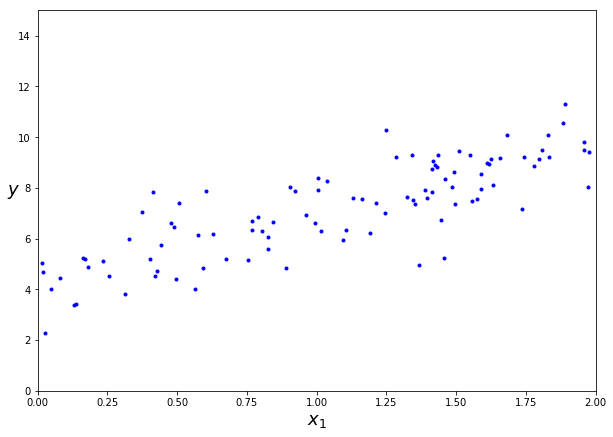

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(10,7))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
interact(plot_func, slope = widgets.FloatSlider(value=1,min=-10,max=10.0,step=0.5), intercept = widgets.FloatSlider(value=1,min=0,max=10.0,step=0.5))


interactive(children=(FloatSlider(value=1.0, description='slope', max=10.0, min=-10.0, step=0.5), FloatSlider(…

<function __main__.plot_func(slope, intercept)>

A convex Loss Function (similar to the one that we have seen in the example above):

<img src="https://dl.dropboxusercontent.com/s/ccqgy5xsfdh09qh/LOSS_convex.jpg?dl=0" width="500">

A non-covex Loss Function with **plateaux**, **local minima** and **global minima**:

<img src="https://dl.dropboxusercontent.com/s/m5m6lln9gorv0hc/LOSS_nonconvex.jpg?dl=0" width="500">

The objective is to find the best model parameters that can minimize a given Loss Function.

<img src="https://dl.dropboxusercontent.com/s/cwnbun77ttemmia/cost.png?dl=0" width="700">



<a id='Sec:Optimizers'></a>

# Optimizers

We've described the problem we want to solve: starting with a bunch of data and a model, we define a loss function that we want to minimize.
Now we need to say *how* to solve it. This is the job of the **optimizer**. The optimizer is an algorithm that adjusts the **model's parameters** to minimize the loss.

<img src="https://dl.dropboxusercontent.com/s/c2c6956p6orz80s/minimization.gif?dl=0" width="1000">

There are many types of optimizers. Among the most common:

- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent




### First some mathematical definitions

The **predicted value $\hat{y}$**:

$ \Large \hat{y^{(i)}} = \theta_{0} + \theta_{1} x_{1}^{(i)} + \theta_{2} x_{2}^{(i)} + ... +  + \theta_{n} x_{n}^{(i)} $

is function of 

an array of **model parameters** $\theta = [\theta_{0}, \theta_{1}, ..., \theta_{n}]$ (note that the model's parameters are not the same of the algorithm's hyperparameters)

and the n **input features** $x^{(i)} = [x_{0}^{(i)}, x_{1}^{(i)}, ..., x_{n}^{(i)}]$ (where $x_{0}^{(i)}=1$)

Thus,

$ \Large \hat{y^{(i)}} = \theta^T x^{(i)} $


<a id='Sec:BGD'></a>

## Batch Gradient descent

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. 

<img src="https://dl.dropboxusercontent.com/s/3m217zjlol566vl/mountain.jpg?dl=0" width="500">


This is exactly what **Gradient Descent** does: it measures the **local gradient** of the Loss function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called **random initialization**), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MAE), until the algorithm converges to a minimum

$ \Large J(\theta) = MSE(\theta)=\frac{1}{n} \sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)}(\theta))^2= \frac{1}{n} \sum_{i=1}^{n}(y^{(i)}-\theta^T x^{(i)})^2$

$\Large \mathbf{\theta}^{(next~step)} \leftarrow \mathbf{\theta} - \eta \nabla_\theta J(\mathbf{\theta}) = \mathbf{\theta} - \eta \nabla_\theta MSE(\mathbf{\theta})$

$\nabla_\theta MSE(\mathbf{\theta})=\left[\begin{array}{c}
\dfrac{\partial}{\partial \theta_0}MSE(\mathbf{\theta})\\
\dfrac{\partial}{\partial \theta_1}MSE(\mathbf{\theta}) \\
\vdots \\
\dfrac{\partial}{\partial \theta_m}MSE(\mathbf{\theta}) 
\end{array}\right] = \frac{2}{n}\mathbf{X}^T(\mathbf{X}\mathbf{\theta}-\mathbf{y})$

It uses the whole **batch** of training data at every step. As a result it is terribly slow on very large training sets.

<a id='Sec:LearningRate'></a>

### $\eta$ = **Learning rate**

An important parameter in Gradient Descent is the size of the steps, determined by the **learning rate** hyperparameter. 

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

<img src="https://dl.dropboxusercontent.com/s/efs2619grv39pa1/Low_LR.png?dl=0" width="700">

If the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

<img src="https://dl.dropboxusercontent.com/s/471ourzg68fm4lu/High_LR.png?dl=0" width="700">

Not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.

- If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. 

- If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

- Sometimes a large learning rate is what allowes you to jump out from a ''local minimum'' valley and enter into the ''global minimum'' valley.

<img src="https://dl.dropboxusercontent.com/s/eax6xmfk2i96bcc/complex_LOSS.png?dl=0" width="700">



In order to find a good learning rate, you can use grid search.

In [10]:
# I add the bias term
X_b = np.c_[np.ones((100, 1)), X]

#print(X_b)

In [11]:
# I run the Batch Gradient Descend

eta = 0.02 # learning rate
n_iterations = 300 # number of iterations
theta = np.random.randn(2,1) # random initialization
theta_path_BGD = [] # this is where I am going to store the results of each step

for iteration in range(n_iterations):
    gradients = 2/len(y) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    #print(r"{} - p0={}; p1={}".format(iteration,np.round(theta[0][0],3),np.round(theta[1][0],3)))
    theta_path_BGD.append(theta)

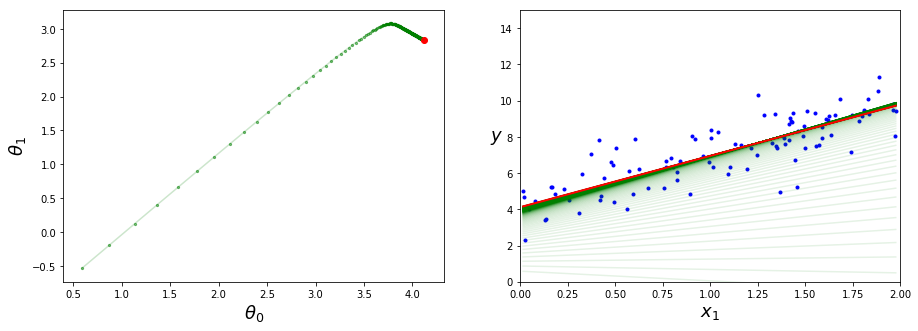

In [12]:
def line(p0,p1,x):
    return p0 + p1*x

plt.figure(figsize=(15,5))

plt.subplot(121)
B = np.reshape(theta_path_BGD, (-1, 2))
plt.plot(B.T[0],B.T[1], color='green', alpha=0.2)
plt.scatter(B.T[0],B.T[1], color='green', s=5, alpha=0.5)
plt.scatter(B.T[0][-1],B.T[1][-1], color='red')
plt.xlabel(r"$\theta_{0}$", fontsize=18)
plt.ylabel(r"$\theta_{1}$", fontsize=18)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
for sol in theta_path_BGD:
    y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
    plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='green', alpha=0.1)
sol = theta_path_BGD[-1]
y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='red', alpha=1., lw=2)
plt.axis([0, 2, 0, 15])
plt.show()

QUESTION 13

<a id='Sec:LearningSchedule'></a>

### Learning schedule

The function that determines the learning rate at each iteration is called the **learning schedule**. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

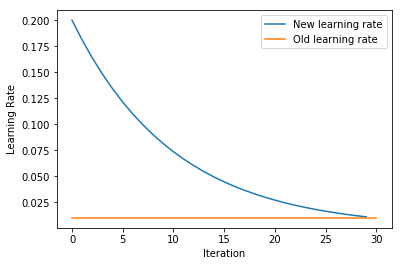

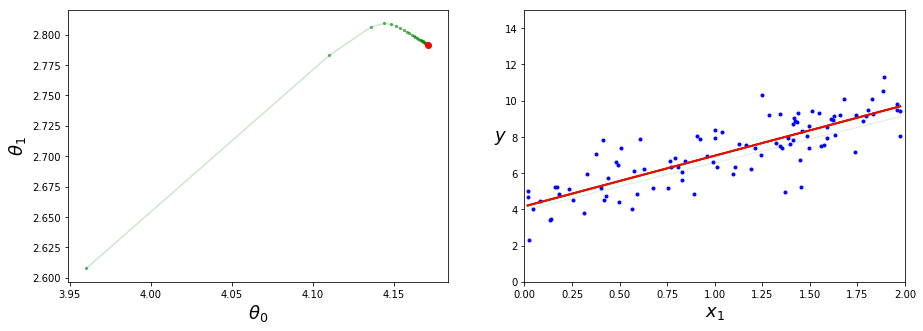

In [15]:

n_iterations = 30 # number of iterations
eta = 0.2 * np.exp(-np.arange(n_iterations)/10) # Learning schedule

plt.plot(np.arange(n_iterations),eta, label='New learning rate')
plt.plot([0,n_iterations],[0.01,0.01], label='Old learning rate')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

theta = np.random.randn(2,1) # random initialization
theta_path_BGD_scheduled = [] # this is where I am going to store the results of each step

for iteration in range(n_iterations):
    gradients = 2/len(y) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta[iteration] * gradients
    #print(r"{} - p0={}; p1={}".format(iteration,np.round(theta[0][0],3),np.round(theta[1][0],3)))
    theta_path_BGD_scheduled.append(theta)
    
def line(p0,p1,x):
    return p0 + p1*x

plt.figure(figsize=(15,5))

plt.subplot(121)
B = np.reshape(theta_path_BGD_scheduled, (-1, 2))
plt.plot(B.T[0],B.T[1], color='green', alpha=0.2)
plt.scatter(B.T[0],B.T[1], color='green', s=5, alpha=0.5)
plt.scatter(B.T[0][-1],B.T[1][-1], color='red')
plt.xlabel(r"$\theta_{0}$", fontsize=18)
plt.ylabel(r"$\theta_{1}$", fontsize=18)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
for sol in theta_path_BGD_scheduled:
    y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
    plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='green', alpha=0.1)
sol = theta_path_BGD_scheduled[-1]
y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='red', alpha=1., lw=2)
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
theta_path_BGD_scheduled[-1]

array([[4.17098859],
       [2.791588  ]])

<a id='Sec:SGD'></a>

## Stochastic Gradient descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks one random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration.

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

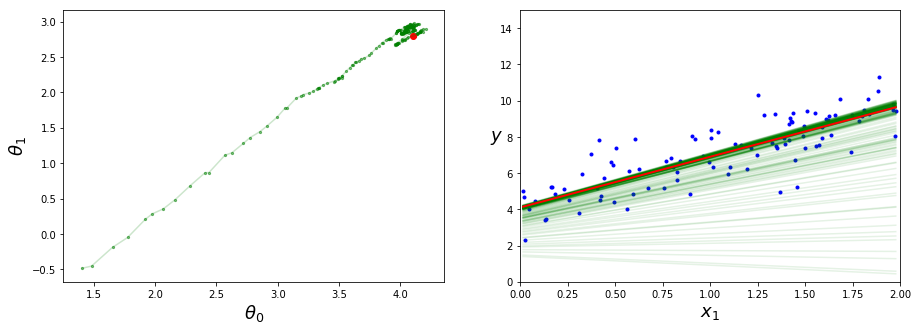

In [18]:
n_epochs = 2
eta=0.01

theta = np.random.randn(2,1)  # random initialization
theta_path_SGD = []

for epoch in range(n_epochs):
    for i in range(len(y)):
        random_index = np.random.randint(len(y))
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_SGD.append(theta)                 

plt.figure(figsize=(15,5))

plt.subplot(121)
B = np.reshape(theta_path_SGD, (-1, 2))
plt.plot(B.T[0],B.T[1], color='green', alpha=0.2)
plt.scatter(B.T[0],B.T[1], color='green', s=5, alpha=0.5)
plt.scatter(B.T[0][-1],B.T[1][-1], color='red')
plt.xlabel(r"$\theta_{0}$", fontsize=18)
plt.ylabel(r"$\theta_{1}$", fontsize=18)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
for sol in theta_path_SGD:
    y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
    plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='green', alpha=0.1)
sol = theta_path_SGD[-1]
y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='red', alpha=1., lw=2)
plt.axis([0, 2, 0, 15])
plt.show()

QUESTION 15

QUESTION. Which is the solution to the main pitfall of Stochastic descent?


<a id='Sec:EarlyStopping'></a>

### Early stopping
You may wonder how to set the number of **iterations**. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny — that is, when its norm becomes smaller than a tiny number ε (called the **tolerance**)

### SGD in Scikit-Learn

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.20761031]), array([2.71614255]))

<a id='Sec:MBGD'></a>

## Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini- batch GD computes the gradients on small random sets of instances called **mini-batches**.

NOTE: the figure below is not SGD!!!!! It is mini-batch GD!!!!

<img src="https://dl.dropboxusercontent.com/s/0ao8cwa5es548ym/MBGD.gif?dl=0" width="1000">




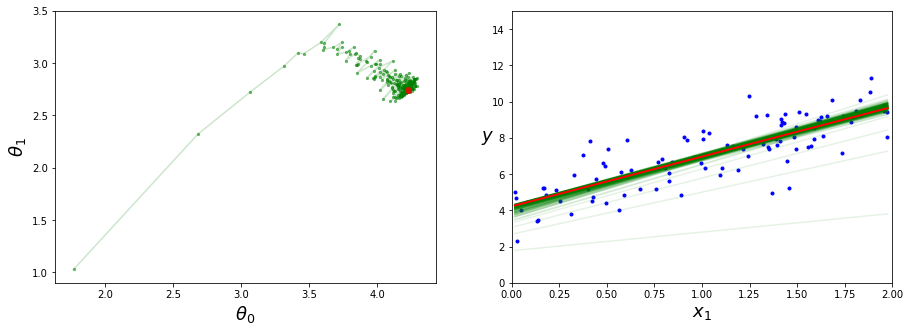

In [29]:
theta_path_MBGD = []
m = len(X_b)

n_iterations = 50
eta=0.1
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(len(y))
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_MBGD.append(theta)
        
plt.figure(figsize=(15,5))

plt.subplot(121)
B = np.reshape(theta_path_MBGD, (-1, 2))
plt.plot(B.T[0],B.T[1], color='green', alpha=0.2)
plt.scatter(B.T[0],B.T[1], color='green', s=5, alpha=0.5)
plt.scatter(B.T[0][-1],B.T[1][-1], color='red')
plt.xlabel(r"$\theta_{0}$", fontsize=18)
plt.ylabel(r"$\theta_{1}$", fontsize=18)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
for sol in theta_path_MBGD:
    y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
    plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='green', alpha=0.1)
sol = theta_path_MBGD[-1]
y_hat = line(sol[0][0], sol[1][0], np.linspace(min(X),max(X)))
plt.plot(np.linspace(min(X),max(X)), y_hat, "-", color='red', alpha=1., lw=2)
plt.axis([0, 2, 0, 15])
plt.show()

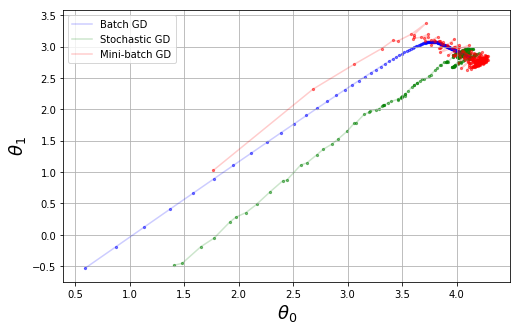

In [30]:
plt.figure(figsize=(8,5))

B = np.reshape(theta_path_BGD, (-1, 2))
plt.plot(B.T[0],B.T[1], color='blue', alpha=0.2, label= 'Batch GD')
plt.scatter(B.T[0],B.T[1], color='blue', s=5, alpha=0.5)

B = np.reshape(theta_path_SGD, (-1, 2))
plt.plot(B.T[0],B.T[1], color='green', alpha=0.2, label= 'Stochastic GD')
plt.scatter(B.T[0],B.T[1], color='green', s=5, alpha=0.5)

B = np.reshape(theta_path_MBGD, (-1, 2))
plt.plot(B.T[0],B.T[1], color='red', alpha=0.2, label= 'Mini-batch GD')
plt.scatter(B.T[0],B.T[1], color='red', s=5, alpha=0.5)

plt.xlabel(r"$\theta_{0}$", fontsize=18)
plt.ylabel(r"$\theta_{1}$", fontsize=18)
plt.grid()
plt.legend()


QUESTION 17

QUESTION 19

QUESTION 20

<a id='Sec:FeatureEngineering'></a>

# Feature engineering

Text(0.5, 0, 'y')

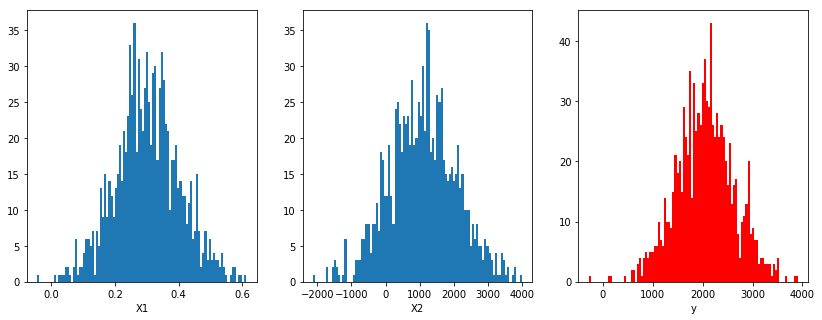

In [146]:
X1 = np.random.normal(loc=0.30, scale=0.1, size=1000)
X2 = np.random.normal(loc=1000.0, scale=1000.0, size=1000)

y = 3000 * X1 + 0.5 * X2 + 600

plt.figure(figsize=(14, 5))
plt.subplot(131)
a = plt.hist(X1, bins=100)
plt.xlabel("X1")

plt.subplot(132)
a = plt.hist(X2, bins=100)
plt.xlabel("X2")

plt.subplot(133)
a = plt.hist(y, bins=100, color='red')
plt.xlabel("y")



In [178]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

X = np.c_[X1, X2]

#X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sgd_reg = SGDRegressor(max_iter=10000, tol=1e-10, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print("RMSE: {}".format(rmse))



RMSE: 1732927914324802.5


In [179]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

n_epochs = 100
eta=0.01
eta=1e-7

theta = np.random.randn(3,1)  # random initialization
theta_path_SGD = []

for epoch in range(n_epochs):
    for i in range(len(y_train)):
        random_index = np.random.randint(len(y_train))
        xi = X_b[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_SGD.append(theta)                 


When you don't standardize:
- theta_1 is supposed to be 3000
- theta_1 is supposed to be 0.5


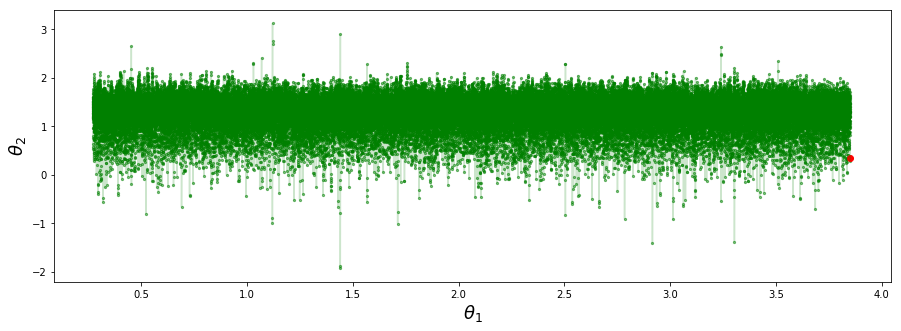

In [180]:
plt.figure(figsize=(15,5))

B = np.reshape(theta_path_SGD, (-1, 3))
plt.plot(B.T[1],B.T[2], color='green', alpha=0.2)
plt.scatter(B.T[1],B.T[2], color='green', s=5, alpha=0.5)
plt.scatter(B.T[1][-1],B.T[2][-1], color='red')
plt.xlabel(r"$\theta_{1}$", fontsize=18)
plt.ylabel(r"$\theta_{2}$", fontsize=18)

print(r"When you don't standardize:")
print(r"- theta_1 is supposed to be 3000")
print(r"- theta_1 is supposed to be 0.5")

<img src="https://dl.dropboxusercontent.com/s/r27eolyxrnojvbe/bias-variance.jpg?dl=0" width="800">




<a id='Sec:LearningCurves'></a>


# Learning Curves


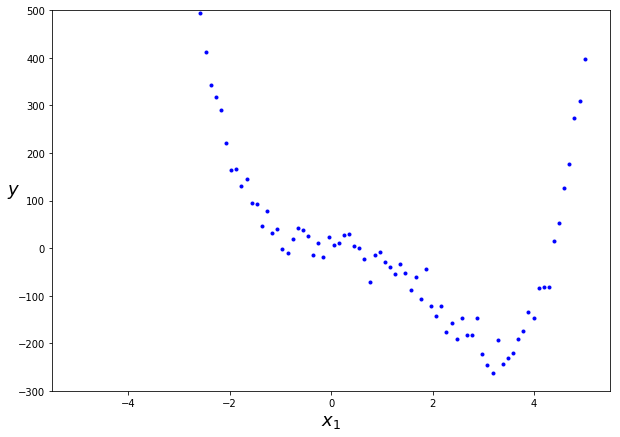

In [342]:
X = np.linspace(-5,5,100)
y = 5.2 * X**4 - 20.5 * X**3 - 10.5 * X**2 + 1.8 * X + 2 + np.random.normal(0, 30, 100)

X = X.reshape(-1, 1)

plt.figure(figsize=(10,7))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.ylim([-300,500])
#plt.axis([0, 2, 0, 15])
plt.show()

(100.0, 10000.0)

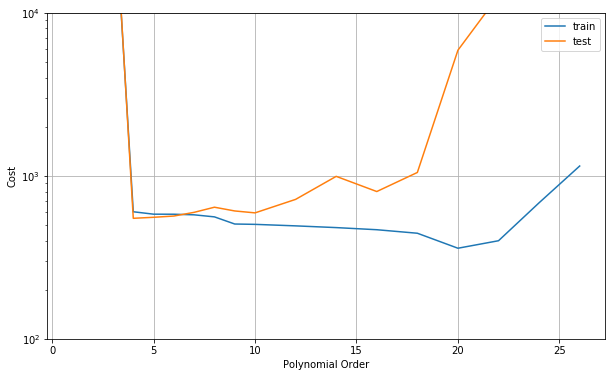

In [343]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

poly_degree = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
poly_degree = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26]
metric_train = []
metric_test = []
pipelines = []

for deg in poly_degree:
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    pipelines.append(pipeline)
    y_train_pred = pipeline.predict(X_train)
    metric_train.append(mean_squared_error(y_train, y_train_pred))
    y_test_pred = pipeline.predict(X_test)
    metric_test.append(mean_squared_error(y_test, y_test_pred))
    
plt.figure(figsize=(10,6))
plt.plot(poly_degree, metric_train, label='train')
plt.plot(poly_degree, metric_test, label='test')
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("Polynomial Order")
plt.ylabel("Cost")
plt.ylim([1e2,1e4])


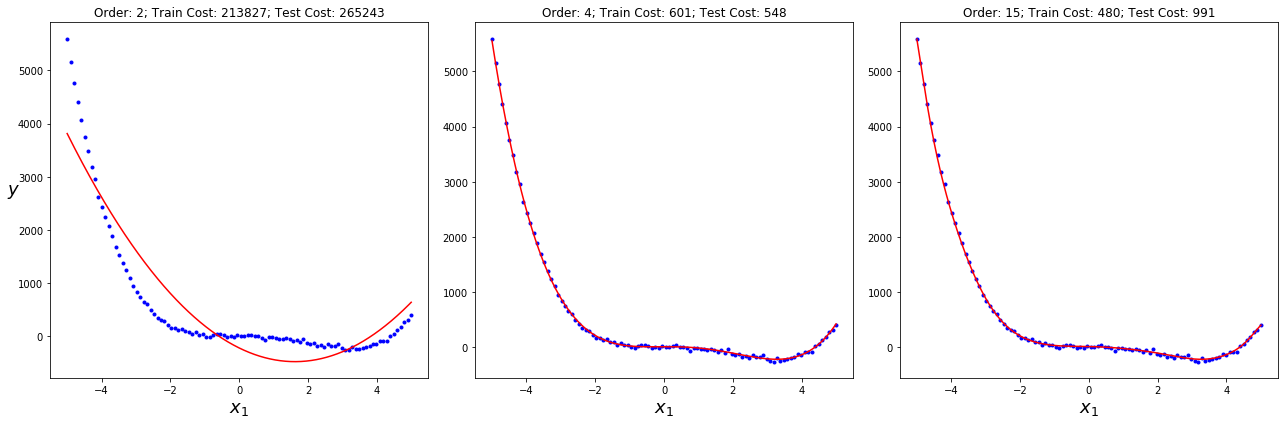

In [344]:
test_models = [2,4,12]

Xplt = np.linspace(-5,5,1000).reshape(-1, 1)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(18, 6))
ax0.plot(X, y, "b.")
y_model = pipelines[test_models[0]-1].predict(Xplt)
ax0.plot(Xplt, y_model, "r-")
ax0.set_title("Order: {}; Train Cost: {}; Test Cost: {}".format(poly_degree[test_models[0]]-1,int(metric_train[test_models[0]-1]),int(metric_test[test_models[0]-1])))
ax0.set_xlabel("$x_1$", fontsize=18)
ax0.set_ylabel("$y$", rotation=0, fontsize=18)

ax1.plot(X, y, "b.")
y_model = pipelines[test_models[1]-1].predict(Xplt)
ax1.plot(Xplt, y_model, "r-")
ax1.set_title("Order: {}; Train Cost: {}; Test Cost: {}".format(poly_degree[test_models[1]]-1,int(metric_train[test_models[1]-1]),int(metric_test[test_models[1]-1])))
ax1.set_xlabel("$x_1$", fontsize=18)
#ax1.set_ylabel("$y$", rotation=0, fontsize=18)

ax2.plot(X, y, "b.")
y_model = pipelines[test_models[2]-1].predict(Xplt)
ax2.plot(Xplt, y_model, "r-")
ax2.set_title("Order: {}; Train Cost: {}; Test Cost: {}".format(poly_degree[test_models[2]]-1,int(metric_train[test_models[2]-1]),int(metric_test[test_models[2]-1])))
ax2.set_xlabel("$x_1$", fontsize=18)
#ax2.set_ylabel("$y$", rotation=0, fontsize=18)
plt.tight_layout()


QUESTION 22

<a id='Sec:BiasVarianceTradeoff'></a>


### Bias/Variance tradeoff

Understanding the training and test (generalization) errors is extremely importanto to estimate the quality of your model.

A model’s **generalization error** can be expressed as the sum of three very different errors:

- **Bias**. This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

- **Variance**. This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

- Irreducible error. This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

<img src="https://dl.dropboxusercontent.com/s/fxtxa5q3vhcaqx2/bias-variance.jpg?dl=0" width="800">

<img src="https://dl.dropboxusercontent.com/s/6mrash19ywx4yto/bias-variance.png?dl=0" width="800">


<a id='Sec:Regularization'></a>


# Regularization

Typically ML algorithms tend to produce very complex models. The risk of overfitting is usually greater than underfitting. In order to reduce (or prevent) overfitting one can **regularize** the model (i.e., constrain the model). This can be done by reducing the degrees of freedom of the model. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees. 

In practice all that can be achieved by adding a penalty term to the cost function. The penalty term will be higher for more complex models. By doing this one forces models to be simpler. There are different types of regularization, depending on the penalty term that you use:

- Ridge regression

- Lasso regression

- Elastic Net

<a id='Sec:Ridge'></a>


### Ridge regression ($l_{2}$)

$ \Large J(\theta)_{reg} = J(\theta) + \alpha \frac{1}{2}\sum_{i=1}^{n}\theta_{i}^2$

- The penalty term forces the components of the $\theta$ vector to be small. In other words, if our dataset contains an irrelevant feature $i$, with the regularization term the $\theta_{i}$ will be very small, close to zero. Hence, the relularizedd model has a lower level of complexity. 
- Note that the bias term is not included in the penalty term.
- This is the cost function used during training. It is different from the const function that should be used for the performance measure on the test sample! Never forget that!
- $\alpha$ controls how much you want to regularize the model.
- Typically, it is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. 

#### Limitations of Ridge Regression
-  It decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient tending to zero rather only minimizes it. Hence, this model is not a good fit for feature reduction.

<a id='Sec:Lasso'></a>


### Lasso regression ($l_1$)

$ \Large J(\theta)_{reg} = J(\theta) + \alpha \sum_{i=1}^{n}|\theta_{i}|$

Lasso tends to completely eliminate the weights of the least important features (i.e., set them to zero).

#### Limitations of Lasso Regression

- Lasso sometimes struggles with some types of data. If the number of features (f) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all features are relevant (or may be used in the test set).
- If there are two or more highly collinear variables then Lasso regression select one of them randomly which is not good for the interpretation of data.

<img src="https://dl.dropboxusercontent.com/s/3cpz9o4lfekzsg3/regularization.gif?dl=0" width="800">



<a id='Sec:ElasticNet'></a>


### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.

$ \Large J(\theta)_{reg} = J(\theta) + r\alpha \sum_{i=1}^{n}|\theta_{i}| + \alpha \frac{1-r}{2}\sum_{i=1}^{n}\theta_{i}^2 + $


### So, what should I use?

It is almost always preferable to have at least a little bit of regularization.

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed.

Elastic Net should be preferred over Lasso when the number of features is greater than the number of training instances or when several features are strongly correlated.


Text(0, 0.5, 'Cost')

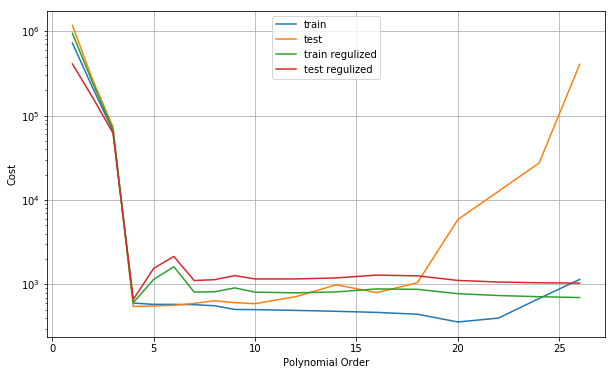

In [345]:
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

poly_degree = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
poly_degree = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26]

metric_train_reg = []
metric_test_reg = []
pipelines = []
coeff = []

for deg in poly_degree:
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),("Regul", Lasso(alpha=1., tol=0.01))])
    pipeline.fit(X_train, y_train)
    coeff.append(np.concatenate([np.array([pipeline['Regul'].intercept_]),pipeline['Regul'].coef_]))
    #coeff.append(pipeline['Ridge'].coef_)
    pipelines.append(pipeline)
    y_train_pred = pipeline.predict(X_train)
    metric_train_reg.append(mean_squared_error(y_train, y_train_pred))
    y_test_pred = pipeline.predict(X_test)
    metric_test_reg.append(mean_squared_error(y_test, y_test_pred))
    
plt.figure(figsize=(10,6))
plt.plot(poly_degree, metric_train, label='train')
plt.plot(poly_degree, metric_test, label='test')
plt.plot(poly_degree, metric_train_reg, label='train regulized')
plt.plot(poly_degree, metric_test_reg, label='test regulized')
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("Polynomial Order")
plt.ylabel("Cost")



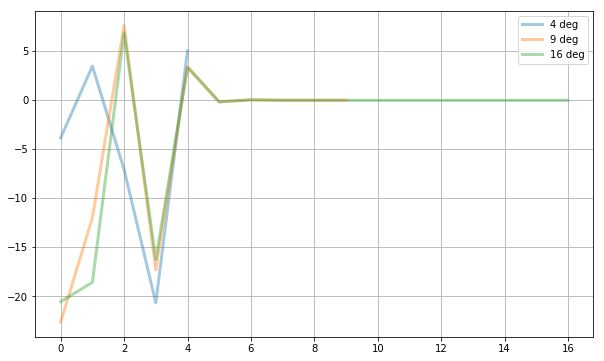

In [346]:
plt.figure(figsize=(10,6))
plt.plot(coeff[3], lw=3, alpha=0.4, label='{} deg'.format(poly_degree[3]))
plt.plot(coeff[8], lw=3, alpha=0.4, label='{} deg'.format(poly_degree[8]))
plt.plot(coeff[12], lw=3, alpha=0.4, label='{} deg'.format(poly_degree[12]))
plt.legend()
plt.grid()

QUESTION 13